# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [71]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [72]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [73]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [74]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [75]:
from sklearn.model_selection import train_test_split

X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [76]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [77]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
print(f"R-squared (training set): {r2_train}")

r2_test = r2_score(y_test, y_test_pred)
print(f"R-squared (testing set): {r2_test}")

R-squared (training set): 0.7508856358979673
R-squared (testing set): 0.6687594935356326


## 4. Calculate and print mean squared error for both the training and the testing set.

In [78]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
print(f"MSE (training set): {mse_train}")

mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE (testing set): {mse_test}")

MSE (training set): 21.641412753226312
MSE (testing set): 24.291119474973478


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [79]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_pred)
print(f"MAE for training set: {mae_train}")

mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"MAE for testing set: {mae_test}")

MAE for training set: 3.314771626783228
MAE for testing set: 3.189091965887837


## Classification Model Evaluation

In [80]:
from sklearn.datasets import load_iris
data = load_iris()

In [81]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [82]:
column_names = data.feature_names

In [83]:
df = pd.DataFrame(data['data'],columns=column_names)

In [84]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [85]:
target = pd.DataFrame(data.target)

In [86]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [87]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [88]:
X = df
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [89]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train.values.ravel())

y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [90]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy (training set): {train_accuracy}")
print(f"Accuracy (testing set): {test_accuracy}")

Accuracy (training set): 0.975
Accuracy (testing set): 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [91]:
from sklearn.metrics import balanced_accuracy_score

train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print(f"Balanced Accuracy (training set): {train_balanced_accuracy}")
print(f"Balanced Accuracy (testing set): {test_balanced_accuracy}")

Balanced Accuracy (training set): 0.975609756097561
Balanced Accuracy (testing set): 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [92]:
from sklearn.metrics import precision_score

train_precision = precision_score(y_train, y_train_pred, average='macro')
test_precision = precision_score(y_test, y_test_pred, average='macro')

print(f"Precision (training set): {train_precision}")
print(f"Precision (testing set): {test_precision}")

Precision (training set): 0.9761904761904763
Precision (testing set): 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [93]:
from sklearn.metrics import recall_score

train_recall = recall_score(y_train, y_train_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')

print(f"Recall (training set): {train_recall}")
print(f"Recall (testing set): {test_recall}")

Recall (training set): 0.975609756097561
Recall (testing set): 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [94]:
from sklearn.metrics import f1_score

train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"F1 Score (training set): {train_f1}")
print(f"F1 Score (testing set): {test_f1}")

F1 Score (training set): 0.974996093139553
F1 Score (testing set): 1.0


## 13. Generate confusion matrices for both the training and the testing set.

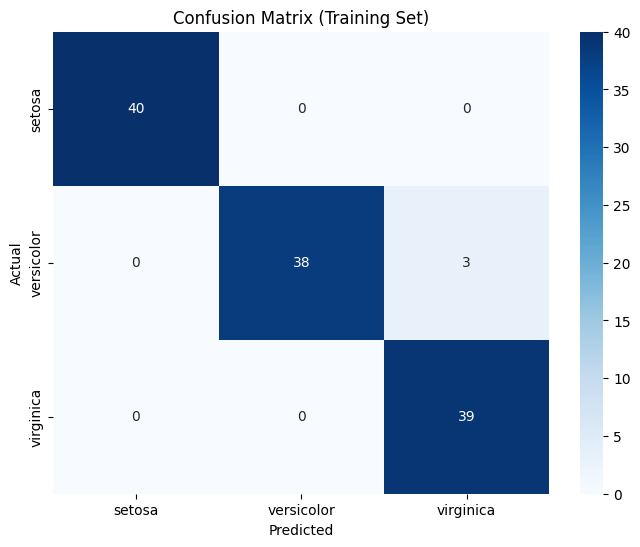

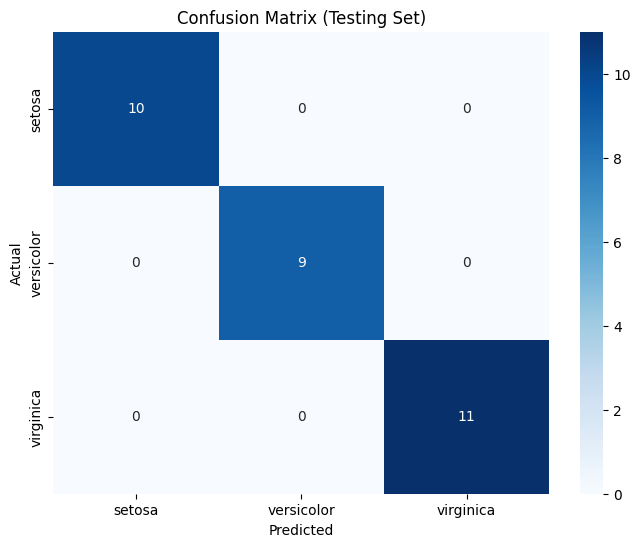

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)

# Plot confusoin matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training Set)')
plt.show()

# Generate confusion matrix for the testing set
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the testing set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Testing Set)')
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [96]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_train_pred = dt_model.predict(X_train)
dt_y_test_pred = dt_model.predict(X_test)

print("Decision Tree Regressor:")
print(f"R-squared (training set): {r2_score(y_train, dt_y_train_pred)}")
print(f"R-squared (testing set): {r2_score(y_test, dt_y_test_pred)}")
print(f"MSE training set: {mean_squared_error(y_train, dt_y_train_pred)}")
print(f"MSE testing set: {mean_squared_error(y_test, dt_y_test_pred)}")
print(f"MAE for training set: {mean_absolute_error(y_train, dt_y_train_pred)}")
print(f"MAE for testing set: {mean_absolute_error(y_test, dt_y_test_pred)}")

Decision Tree Regressor:
R-squared (training set): 1.0
R-squared (testing set): 1.0
MSE training set: 0.0
MSE testing set: 0.0
MAE for training set: 0.0
MAE for testing set: 0.0


In [97]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_train_pred = rf_model.predict(X_train)
rf_y_test_pred = rf_model.predict(X_test)

print("\nRandom Forest Regressor:")
print(f"R-squared (training set): {r2_score(y_train, rf_y_train_pred)}")
print(f"R-squared (testing set): {r2_score(y_test, rf_y_test_pred)}")
print(f"MSE training set: {mean_squared_error(y_train, rf_y_train_pred)}")
print(f"MSE testing set: {mean_squared_error(y_test, rf_y_test_pred)}")
print(f"MAE for training set: {mean_absolute_error(y_train, rf_y_train_pred)}")
print(f"MAE for testing set: {mean_absolute_error(y_test, rf_y_test_pred)}")


Random Forest Regressor:
R-squared (training set): 0.9905091254351724
R-squared (testing set): 0.9980206677265501
MSE training set: 0.006247500000000002
MSE testing set: 0.0013833333333333336
MAE for training set: 0.02608333333333334
MAE for testing set: 0.01366666666666667


In [98]:
# Have fun here !